In [2]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatística chi2
import plotly.graph_objects as go # gráficos 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo
                                                        #logístico multinomial
import warnings
warnings.filterwarnings('ignore')

In [3]:
# In[EXEMPLO 1]:
#############################################################################
#                      REGRESSÃO LOGÍSTICA BINÁRIA                          #                  
#               EXEMPLO 1 - CARREGAMENTO DA BASE DE DADOS                   #
#############################################################################

df_carne = pd.read_csv('df_rmn.csv',delimiter=',')

# Características das variáveis do dataset
df_carne.info()

# Estatísticas univariadas
df_carne.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   classe             1000 non-null   int64  
 1   intensidade_sinal  1000 non-null   float64
 2   umidade            1000 non-null   float64
 3   luminosidade       1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


,classe,intensidade_sinal,umidade,luminosidade
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.258000,29.850511,0.603392,69.882533
std,0.437753,14.211364,0.200798,5.020484
min,0.000000,0.000000,-0.126887,51.003242
25%,0.000000,19.582629,0.466587,66.717979
50%,0.000000,29.509782,0.602081,69.682891
75%,1.000000,39.457260,0.738815,73.270498
max,1.000000,74.951726,1.411920,85.245256


In [4]:
#Estimação de um modelo logístico binário pela função 'smf.glm'
#('statsmodels.formula.api')
modelo_rmn = smf.glm(formula='classe ~ intensidade_sinal + umidade + luminosidade',
                     data=df_carne, family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_atrasos'
modelo_rmn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 classe   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -185.44
Date:                Sun, 13 Apr 2025   Deviance:                       370.88
Time:                        20:13:06   Pearson chi2:                     353.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -16.7372      2.258     -7.412      0.000     -21.163     -12.311
intensidade_sinal     0.3558      0.027     13.045      0.000       0.302       0.409
umidade              -0.0312      0.640     -0.049      0.961      -1.286       1.224
luminosidade          0.0369      0.026      1.419      0.156      -0.014       0.088
=====================================================================================
"""

In [5]:
# In[1.3]: Outputs do modelo pela função 'summary_col'
summary_col([modelo_rmn],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.3f}".format(x.llf)
        })

,MODELO
Intercept,-16.7372***
,(2.2583)
intensidade_sinal,0.3558***
,(0.0273)
umidade,-0.0312
,(0.6404)
luminosidade,0.0369
,(0.0260)
N,1000
Log-lik,-185.442


In [6]:
# In[1.5]: Construção de uma matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados
df_carne['phat'] = modelo_rmn.predict()

# Visualização da base de dados com a variável 'phat'
df_carne

,classe,intensidade_sinal,umidade,luminosidade,phat
0,0,43.097393,0.668410,73.396712,7.825930e-01
1,1,36.192234,0.397114,72.604725,2.320573e-01
2,1,53.349120,0.355536,64.608831,9.901880e-01
3,0,17.929937,0.700865,66.721904,3.630153e-04
4,0,19.344955,0.372973,74.479639,8.072103e-04
...,...,...,...,...,...
995,0,27.972347,0.469383,73.264523,1.631385e-02
996,0,0.000000,0.567815,70.553358,7.122772e-07
997,0,41.019917,0.708989,77.724101,6.681637e-01
998,0,33.703622,1.411920,70.278373,9.979042e-02


<function matplotlib.pyplot.show(close=None, block=None)>

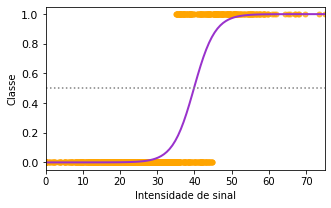

In [7]:
# In[1.7]: Ajuste logístico determinístico entre a variável dependente e a
#variável 'sem'

# Sigmoide

plt.figure(figsize=(5,3))
sns.regplot(x=df_carne['intensidade_sinal'], y=df_carne['classe'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':25, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':2})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Intensidade de sinal', fontsize=10)
plt.ylabel('Classe', fontsize=10)
plt.xticks(np.arange(0, df_carne['intensidade_sinal'].max() + 0.1, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=11)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

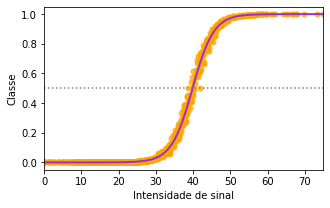

In [8]:
# In[1.8]: Ajuste logístico probabilístico entre a variável dependente e a
#variável 'sem'

# Sigmoide

plt.figure(figsize=(5,3))
sns.regplot(x=df_carne['intensidade_sinal'], y=df_carne['phat'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':25, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':2})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Intensidade de sinal', fontsize=10)
plt.ylabel('Classe', fontsize=10)
plt.xticks(np.arange(0, df_carne['intensidade_sinal'].max() + 0.01, 10),
           fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show

In [9]:
# In[1.9]: Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

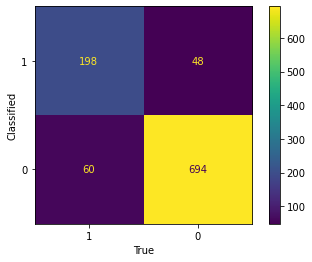

   Sensitividade  Especificidade  Acurácia
0       0.767442         0.93531     0.892


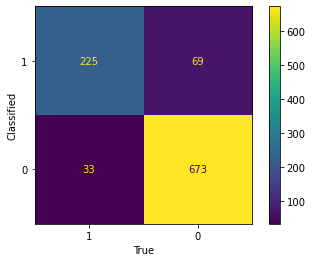

   Sensitividade  Especificidade  Acurácia
0       0.872093        0.907008     0.898


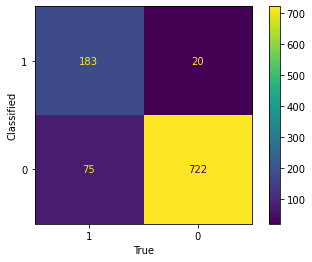

   Sensitividade  Especificidade  Acurácia
0       0.709302        0.973046     0.905


In [10]:
# In[1.10]: Matrizes de confusão propriamente ditas

# Matriz de confusão para cutoff = 0.5
ind_05 = matriz_confusao(observado=df_carne['classe'],
                predicts=df_carne['phat'], 
                cutoff=0.5)
print(ind_05)

# Matriz de confusão para cutoff = 0.3
ind_03 = matriz_confusao(observado=df_carne['classe'],
                predicts=df_carne['phat'], 
                cutoff=0.3)
print(ind_03)

# Matriz de confusão para cutoff = 0.7
ind_07 = matriz_confusao(observado=df_carne['classe'],
                predicts=df_carne['phat'], 
                cutoff=0.7)
print(ind_07)

In [11]:
# In[1.11]: Igualando critérios de especificidade e de sensitividade

# Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

# ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA, o procedimento garante a maximização da acurácia do modelo!

# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # Adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # Range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado


In [12]:
# In[1.12]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados (dataframe 'dados_plotagem')

dados_plotagem = espec_sens(observado = df_carne['classe'],
                            predicts = df_carne['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.574124
2,0.02,1.000000,0.653639
3,0.03,1.000000,0.694070
4,0.04,1.000000,0.716981
...,...,...,...
96,0.96,0.387597,1.000000
97,0.97,0.344961,1.000000
98,0.98,0.294574,1.000000
99,0.99,0.213178,1.000000


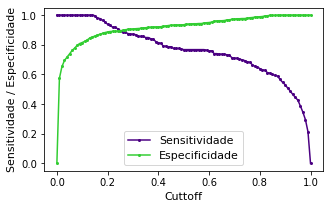

In [13]:
# In[1.13]: Plotagem de um gráfico que mostra a variação da especificidade e da
#sensitividade em função do cutoff

plt.figure(figsize=(5,3))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=2)
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=2)
plt.xlabel('Cuttoff', fontsize=11)
plt.ylabel('Sensitividade / Especificidade', fontsize=11)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=11)
plt.show()

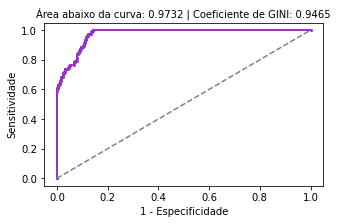

In [14]:
# In[1.14]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_carne['classe'], df_carne['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=2, linewidth=2)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=10)
plt.xlabel('1 - Especificidade', fontsize=10)
plt.ylabel('Sensitividade', fontsize=10)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=10)
plt.show()